Dataset Sample:
         Date  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  \
0  2024-01-03              15.92              19.33               6.94   
1  2024-01-04              14.71              19.47               4.60   
2  2024-01-05              16.87              19.72              10.55   
3  2024-01-06              18.77              20.26              13.15   
4  2024-01-07              18.04              20.18              11.29   

   ALLSKY_SFC_SW_DIFF   PSH    T2M  CLOUD_AMT  AOD_55   RH2M  WS2M  
0                9.02  0.38  27.96      47.62    0.64  83.46  2.22  
1                8.64  0.35  28.18      65.96    0.61  82.49  2.05  
2                8.19  0.41  27.89      52.12    0.54  84.42  1.91  
3                8.81  0.45  27.93      15.74    0.47  83.29  1.65  
4                9.30  0.43  28.00      32.12    0.47  84.24  1.70  

Missing Values per Column:
Date                  0
ALLSKY_SFC_SW_DWN     0
CLRSKY_SFC_SW_DWN     0
ALLSKY_SFC_SW_DNI     0
A

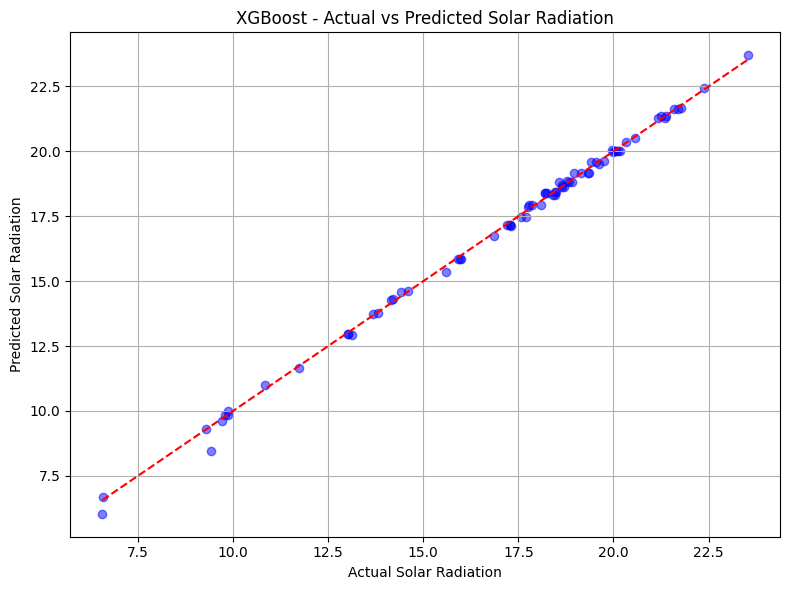

In [ ]:
# 1. Install XGBoost (if not already installed)
!pip install xgboost --quiet

# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 3. Load Dataset
# Please upload your file and update the path below
file_path = '/content/nasa_power_data_all_params.csv'
df = pd.read_csv(file_path)

# 4. Inspect and Clean Data
print("Dataset Sample:")
print(df.head())

print("\nMissing Values per Column:")
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop(columns=['Date'])

# 5. Define Features and Target
# Change to your actual solar radiation column name if needed
target_col = 'ALLSKY_SFC_SW_DWN'
X = df.drop(columns=[target_col])
y = df[target_col]

# 6. Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# 8. Predict
y_pred = xgb_model.predict(X_test)

# 9. Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nXGBoost Regression Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 10. Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Solar Radiation")
plt.ylabel("Predicted Solar Radiation")
plt.title("XGBoost - Actual vs Predicted Solar Radiation")
plt.grid(True)
plt.tight_layout()
plt.show()